<a href="https://colab.research.google.com/github/alain-michael/Football-data-scraper-and-prediction/blob/main/House%20Price%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Housing price prediction model**

**Importing dependencies**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D

**Read data into a dataframe**

In [3]:
df = pd.read_csv('csvdata.csv')

**Some statistics about the dataset**

In [5]:
print(df.describe())
df.nunique()

         Unnamed: 0         Price          Area  No. of Bedrooms
count  29135.000000  2.913500e+04  29135.000000     29135.000000
mean    3058.808238  1.195267e+07   1301.816475         2.421074
std     1923.174050  2.387647e+07    767.862339         0.821016
min        0.000000  2.000000e+06    200.000000         1.000000
25%     1431.000000  4.179999e+06    870.000000         2.000000
50%     2891.000000  6.884999e+06   1137.000000         2.000000
75%     4539.500000  1.230000e+07   1504.000000         3.000000
max     7718.000000  8.546000e+08  16000.000000         9.000000


Unnamed: 0         7657
City                  6
Price              4924
Area               2452
Location           1776
No. of Bedrooms       9
dtype: int64

In [4]:
print(df['City'].value_counts())

Mumbai       6925
Kolkata      6275
Bangalore    5521
Chennai      4307
Delhi        4109
Hyderabad    1998
Name: City, dtype: int64


**Graph to show relation between area, price and city**

<Axes: xlabel='Area', ylabel='Price'>

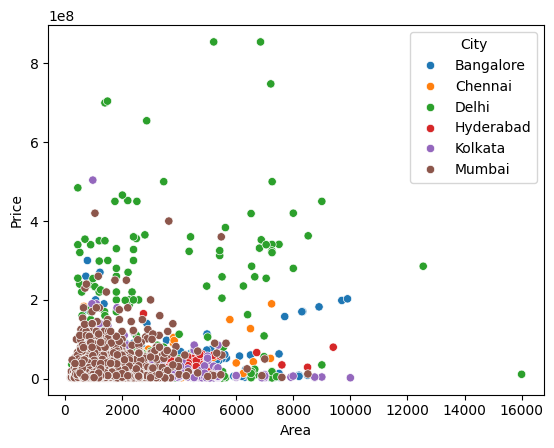

In [66]:
import seaborn as sns

sns.scatterplot(x="Area", y="Price", hue="City", data=df)

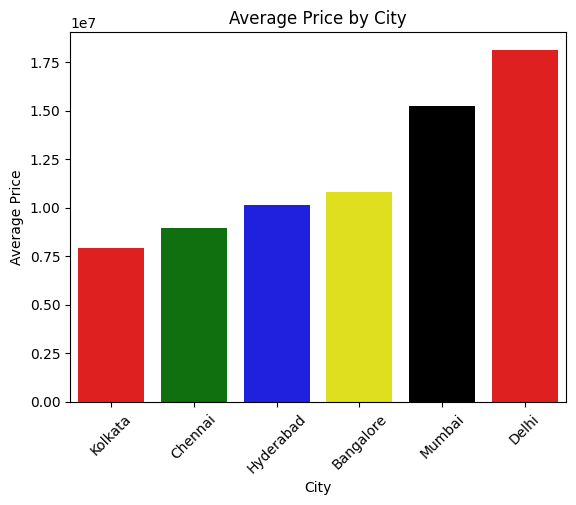

In [64]:
data=df.groupby(['City'])['Price'].mean().sort_values()
colors = ["red", "green", "blue", "yellow", "black"]
sns.barplot(data=data, palette=colors)

# Add title and axis labels
plt.title('Average Price by City')
plt.xlabel('City')
plt.ylabel('Average Price')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

**Preprocessing data**

In [8]:
result = pd.concat([df[df.columns[1]],df[df.columns[3:]]],axis=1, join="inner")
result = pd.get_dummies(result, columns = ['City', 'Location'])

In [9]:
x_train = result[:int(len(result) * 0.8)]
x_test = result[int(len(result) * 0.8):]
y_train = df[df.columns[2]][:int(len(result) * 0.8)]
y_test = df[df.columns[2]][int(len(result) * 0.8):]

**Trying a linear regression model**

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [10]:
linear = LinearRegression()
linear.fit(x_train, y_train)

LinearRegression()

In [11]:
y_predict = linear.predict(x_test)

In [13]:
r2_score(y_test, y_predict)

-306480104712220.6

**Creating a multilayer perceptron (MLP) neural network**

In [14]:
model = Sequential([
    Dense(400, activation="relu"),
    Dense(1)], name = "price_model")

In [15]:
model.compile(
    loss = tf.keras.losses.MeanSquaredError(),
    optimizer = tf.keras.optimizers.Adam(0.001),
)

**Training the neural network**

In [16]:
model.fit(x_train,y_train,epochs=12)

Epoch 1/12
729/729 [==============================] - 11s 12ms/step - loss: 739387948138496.0000 - accuracy: 0.0000e+00
Epoch 2/12
729/729 [==============================] - 8s 11ms/step - loss: 732471909941248.0000 - accuracy: 0.0000e+00
Epoch 3/12
729/729 [==============================] - 9s 13ms/step - loss: 719982883241984.0000 - accuracy: 0.0000e+00
Epoch 4/12
729/729 [==============================] - 11s 15ms/step - loss: 704584083308544.0000 - accuracy: 0.0000e+00
Epoch 5/12
729/729 [==============================] - 13s 18ms/step - loss: 687317576581120.0000 - accuracy: 0.0000e+00
Epoch 6/12
729/729 [==============================] - 8s 10ms/step - loss: 669450713956352.0000 - accuracy: 0.0000e+00
Epoch 7/12
729/729 [==============================] - 8s 11ms/step - loss: 651979390976000.0000 - accuracy: 0.0000e+00
Epoch 8/12
729/729 [==============================] - 7s 10ms/step - loss: 635195128545280.0000 - accuracy: 0.0000e+00
Epoch 9/12
729/729 [=========================

In [17]:
df[int(len(df)*0.8)+100:int(len(df)*0.8)+110]

,Unnamed: 0,City,Price,Area,Location,No. of Bedrooms
23408,1447,Mumbai,23500000,410,Greater Khanda,1
23409,1448,Mumbai,7500000,1300,link road borivali west,2
23410,1449,Mumbai,15000000,495,Borivali West,1
23411,1450,Mumbai,220000000,1450,Manpada,3
23412,1451,Mumbai,3500000,7600,Andheri West,5
23413,1452,Mumbai,12500000,550,Kalyan East,1
23414,1453,Mumbai,16800000,880,Thane West,2
23415,1454,Mumbai,17500000,922,Andheri East,2
23416,1455,Mumbai,16500000,1050,Andheri East,1
23417,1456,Mumbai,14800000,1020,Andheri East,1


**Evaluating the performance of the model**

In [ ]:
prediction = model.predict(x_test)

In [19]:
print(prediction[:10])

[[ 6427861. ]
 [ 6427500. ]
 [ 5479677.5]
 [10541091. ]
 [ 3630202.5]
 [10514937. ]
 [ 5263536. ]
 [10515735. ]
 [ 5264334. ]
 [ 5687416. ]]


In [70]:
r2_score(y_test,prediction), mean_squared_error(y_test, prediction), mean_absolute_error(y_test, prediction)

(-0.22992993057659272, 457317995518516.44, 10819232.200489102)

**Feature scaling with StandardScaler**

In [68]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc_result = sc.fit_transform(result)
scx_train = sc_result[:int(len(sc_result) * 0.8)]
scx_test = sc_result[int(len(sc_result) * 0.8):]
scy_train = df[df.columns[2]][:int(len(sc_result) * 0.8)]
scy_test = df[df.columns[2]][int(len(sc_result) * 0.8):]

In [69]:
sc_model = Sequential([
    Dense(400, activation="relu"),
    Dense(1)], name = "price_model")
sc_model.compile(
    loss = tf.keras.losses.MeanSquaredError(),
    optimizer = tf.keras.optimizers.Adam(0.001),
)
sc_model.fit(scx_train,scy_train,epochs=12)

Epoch 1/12
729/729 [==============================] - 9s 11ms/step - loss: 740562957238272.0000
Epoch 2/12
729/729 [==============================] - 8s 10ms/step - loss: 740318412537856.0000
Epoch 3/12
729/729 [==============================] - 8s 10ms/step - loss: 739864152637440.0000
Epoch 4/12
729/729 [==============================] - 7s 9ms/step - loss: 739239302004736.0000
Epoch 5/12
729/729 [==============================] - 8s 11ms/step - loss: 738467080306688.0000
Epoch 6/12
729/729 [==============================] - 7s 9ms/step - loss: 737559969792000.0000
Epoch 7/12
729/729 [==============================] - 8s 11ms/step - loss: 736541257236480.0000
Epoch 8/12
729/729 [==============================] - 7s 10ms/step - loss: 735419398356992.0000
Epoch 9/12
729/729 [==============================] - 7s 10ms/step - loss: 734172113010688.0000
Epoch 10/12
729/729 [==============================] - 9s 12ms/step - loss: 732837921685504.0000
Epoch 11/12
729/729 [====================

In [71]:
sc_prediction = sc_model.predict(scx_test)
print(r2_score(scy_test,sc_prediction), mean_squared_error(scy_test, sc_prediction), mean_absolute_error(scy_test, sc_prediction))

183/183 [==============================] - 1s 7ms/step
-0.6014202089372569 595447156563382.1 14957603.979020393
